In [135]:
import pandas as pd
import io
import msoffcrypto
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

<center><h1 style="color: pink;">LABOLATORIUM 6</h1></center>


**ZADANIE 1**

WCZYTANIE DANYCH

In [136]:
data=io.BytesIO()
with open("Lab6_data.xlsx",'rb') as f:
    excel=msoffcrypto.OfficeFile(f)
    excel.load_key("Pr$d_6_dat012")
    excel.decrypt(data)

df=pd.read_excel(data)

In [137]:
df.shape

(5501, 9)

In [138]:
df.head(5)

,DEPT [MD],VP [m/s],VSX [m/s],VSY [m/s],PAR1,PAR2,PAR3,PAR4,PAR5
0,1050.0,3055,1531,1573,49766683317413,1.490218e-07,88,8.917627e+12,1.629024e+10
1,1050.1,3034,1517,1552,51917976630989,1.447758e-07,98,-4.181219e+13,1.711206e+10
2,1050.2,3025,1510,1539,52937501416995,1.421186e-07,101,-2.550837e+13,1.750000e+10
3,1050.3,3016,1504,1526,53973542181495,1.395260e-07,105,-5.251573e+13,1.789574e+10
4,1050.4,3030,1498,1523,54823457877834,1.388839e-07,106,-6.034015e+14,1.809355e+10


**ZADANIE 2**

## EDA 

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5501 entries, 0 to 5500
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPT [MD]  5501 non-null   float64
 1   VP [m/s]   5501 non-null   int64  
 2   VSX [m/s]  5501 non-null   int64  
 3   VSY [m/s]  5501 non-null   int64  
 4   PAR1       5501 non-null   int64  
 5   PAR2       5501 non-null   float64
 6   PAR3       5501 non-null   int64  
 7   PAR4       5501 non-null   float64
 8   PAR5       5501 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 386.9 KB


In [140]:
df.describe()

,DEPT [MD],VP [m/s],VSX [m/s],VSY [m/s],PAR1,PAR2,PAR3,PAR4,PAR5
count,5501.000000,5501.000000,5501.000000,5501.000000,5.501000e+03,5.501000e+03,5501.000000,5.501000e+03,5.501000e+03
mean,1325.000000,3438.722232,1778.546264,1806.961825,2.820698e+13,2.047514e-07,91.562261,-7.747425e+12,8.441844e+09
std,158.814625,218.656326,169.944724,172.490712,1.184023e+13,4.322203e-08,8.429687,4.695632e+14,4.025102e+09
min,1050.000000,2922.000000,1411.000000,1429.000000,7.239360e+12,1.208362e-07,71.000000,-1.119341e+16,1.755848e+09
25%,1187.500000,3253.000000,1627.000000,1660.000000,1.818570e+13,1.678445e-07,85.000000,-2.647683e+13,5.083176e+09
50%,1325.000000,3439.000000,1768.000000,1807.000000,2.602817e+13,2.021725e-07,92.000000,-8.689318e+11,7.557726e+09
75%,1462.500000,3600.000000,1911.000000,1929.000000,3.794837e+13,2.335539e-07,98.000000,2.496423e+13,1.167083e+10
max,1600.000000,4123.000000,2319.000000,2389.000000,7.163776e+13,3.742931e-07,114.000000,9.500925e+15,2.373683e+10


## ZAŁOŻENIE WSPÓŁLINIOWOŚCI

In [141]:
corr=df.corr(method='pearson')

In [142]:
corr.style.background_gradient(cmap='coolwarm')

,DEPT [MD],VP [m/s],VSX [m/s],VSY [m/s],PAR1,PAR2,PAR3,PAR4,PAR5
DEPT [MD],1.000000,0.735387,0.761849,0.750307,-0.751214,0.742527,-0.389533,0.006942,-0.748803
VP [m/s],0.735387,1.000000,0.956302,0.955601,-0.931246,0.953744,-0.513735,0.019658,-0.934338
VSX [m/s],0.761849,0.956302,1.000000,0.975281,-0.967947,0.975154,-0.492330,0.025064,-0.958962
VSY [m/s],0.750307,0.955601,0.975281,1.000000,-0.944963,0.997957,-0.486771,0.024677,-0.939564
PAR1,-0.751214,-0.931246,-0.967947,-0.944963,1.000000,-0.930498,0.485236,-0.030833,0.998595
PAR2,0.742527,0.953744,0.975154,0.997957,-0.930498,1.000000,-0.484525,0.023551,-0.923348
PAR3,-0.389533,-0.513735,-0.492330,-0.486771,0.485236,-0.484525,1.000000,-0.035497,0.487607
PAR4,0.006942,0.019658,0.025064,0.024677,-0.030833,0.023551,-0.035497,1.000000,-0.030274
PAR5,-0.748803,-0.934338,-0.958962,-0.939564,0.998595,-0.923348,0.487607,-0.030274,1.000000


Zmienną zależną w moich modelach jest VP [m/s] czyli prędkość fali podłużnej, a do zmiennych niezależnych wybieram PAR2 oraz PAR3. Chcę zrobić model, ktory przewiduje prędkość na danej głębokości. PAR1,PAR2,PAR5 -> mają bardzo wysoką korelację, istnieje duża zależność liniowa pomiędzy VP. Jednak PAR1 z PAR2 --> również wysoka, PAR2 z PAR5 też wysoka, PAR5 z PAR1 to samo - mogłyby dominować nad rozwiązaniem. Natomiast z PAR4 jest niemal zerowa zależność. Zatem nie wybieram ich do modelu.

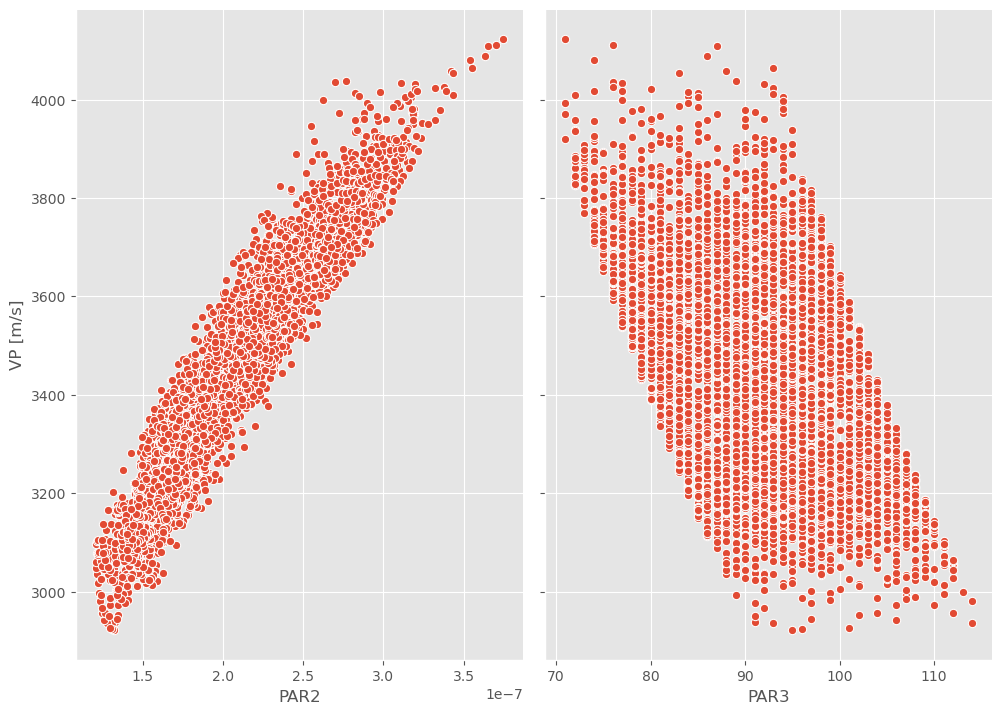

In [143]:
p = sns.pairplot(df, x_vars=['PAR2','PAR3'], y_vars='VP [m/s]', height=7, aspect=0.7)

Dla PAR2 widać znaczną lepszą zależność liniową.

## ROZKŁADY PARAMETRÓW

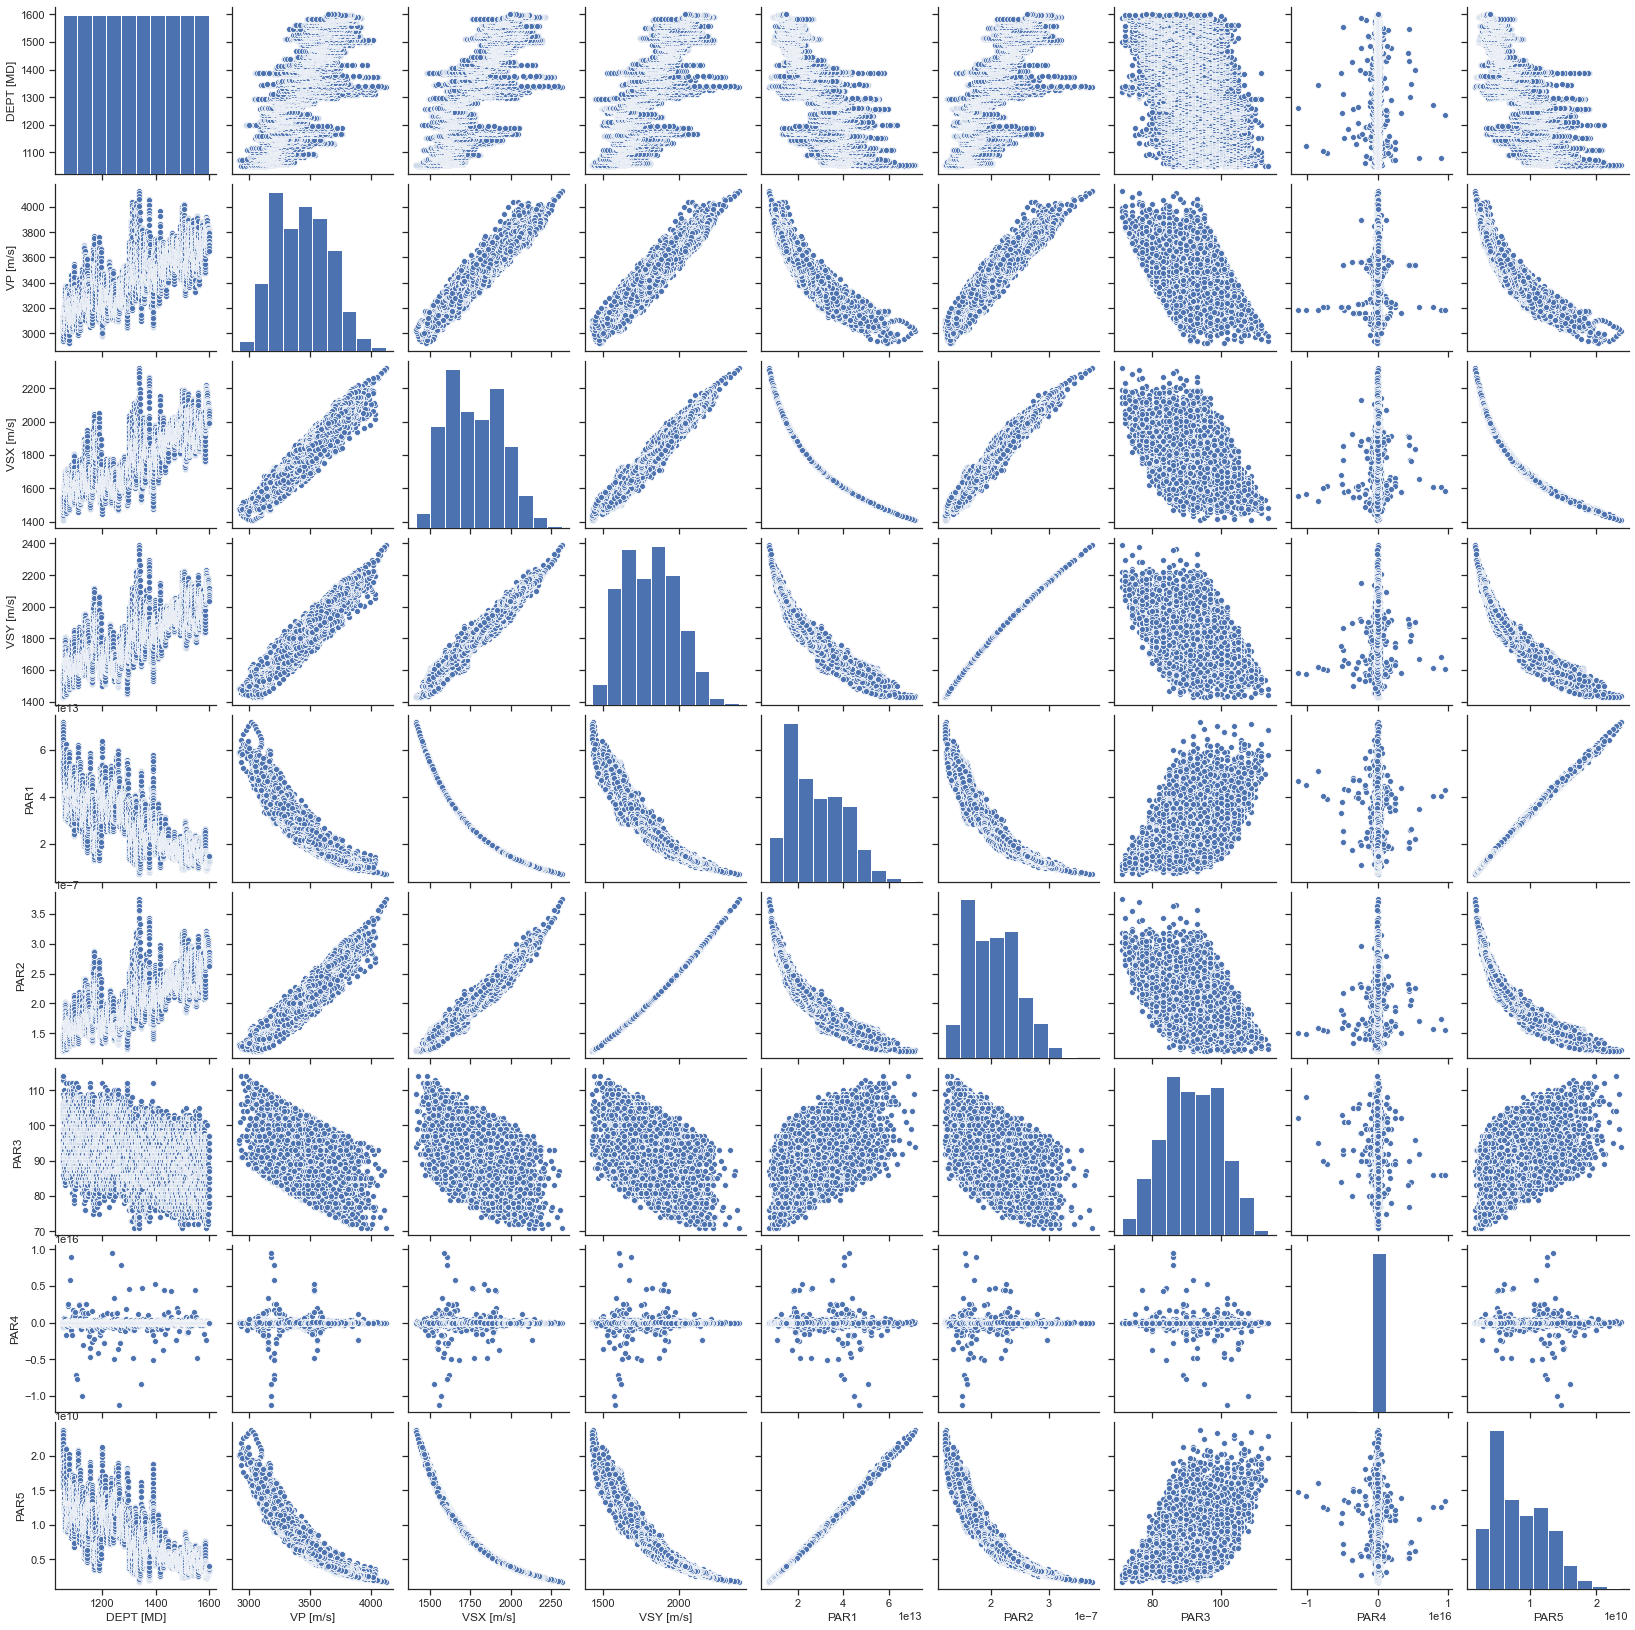

In [10]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)
plt.show()

KOLEJNE ZAŁOŻENIA SPRAWDZONE ZOSTANĄ PO WYKONANIU MODELU REGRESJI

**ZADANIE 3**

## PRZYGOTOWANIE DANYCH

In [144]:
df.columns

Index(['DEPT [MD]', 'VP [m/s]', 'VSX [m/s]', 'VSY [m/s]', 'PAR1', 'PAR2',
       'PAR3', 'PAR4', 'PAR5'],
      dtype='object')

In [145]:
df.sample(20)

,DEPT [MD],VP [m/s],VSX [m/s],VSY [m/s],PAR1,PAR2,PAR3,PAR4,PAR5
3523,1402.3,3479,1770,1845,25853664405871,2.117990e-07,81,5.274704e+13,7.431349e+09
4970,1547.0,3364,1814,1803,23130087008547,2.013145e-07,82,-9.071462e+12,6.875769e+09
5041,1554.1,3628,1951,1911,16533416348491,2.288148e-07,88,-6.821486e+11,4.557171e+09
1323,1182.3,3115,1587,1625,42424020798258,1.600150e-07,98,-2.198251e+14,1.361927e+10
1807,1230.7,3363,1661,1751,34524784149542,1.888307e-07,105,-4.475693e+14,1.026607e+10
3135,1363.5,3743,2006,2104,14518395989804,2.829599e-07,83,-6.819582e+13,3.878813e+09
2963,1346.3,3325,1671,1716,33582694308642,1.804357e-07,101,4.135867e+13,1.010006e+10
3327,1382.7,3450,1751,1749,27165513389104,1.882576e-07,98,-1.806637e+13,7.874062e+09
5181,1568.1,3533,1872,1923,20004225623094,2.320403e-07,98,4.164070e+13,5.662107e+09
3873,1437.3,3465,1807,1879,23546833437262,2.204448e-07,90,-2.138374e+13,6.795623e+09


In [146]:
dept=df["DEPT [MD]"]
df_new=df.drop(["DEPT [MD]","VSX [m/s]","VSY [m/s]","PAR1","PAR4","PAR5"], axis=1)
df_new

,VP [m/s],PAR2,PAR3
0,3055,1.490218e-07,88
1,3034,1.447758e-07,98
2,3025,1.421186e-07,101
3,3016,1.395260e-07,105
4,3030,1.388839e-07,106
...,...,...,...
5496,3733,2.733877e-07,91
5497,3707,2.707722e-07,78
5498,3700,2.671700e-07,97
5499,3678,2.641442e-07,80


Pomiędzy wybranymi parametrami jest duża różnica magnitudy. Skaluję zatem dane:

In [147]:
VP=df_new["VP [m/s]"].values.reshape(-1,1)

In [148]:
scaler2=MinMaxScaler()
scaler2.fit(VP)
VP_scaled=scaler2.transform(VP)
VP_scaled

array([[0.11074105],
       [0.09325562],
       [0.08576187],
       ...,
       [0.64779351],
       [0.62947544],
       [0.60949209]])

In [149]:
par_model=df_new.iloc[:,-2:]
par_model

,PAR2,PAR3
0,1.490218e-07,88
1,1.447758e-07,98
2,1.421186e-07,101
3,1.395260e-07,105
4,1.388839e-07,106
...,...,...
5496,2.733877e-07,91
5497,2.707722e-07,78
5498,2.671700e-07,97
5499,2.641442e-07,80


In [150]:
scaler = MinMaxScaler()
scaler.fit(par_model)
scaled_features = scaler.transform(par_model)
df_scaled = pd.DataFrame(scaled_features,columns=par_model.columns)
df_scaled

,PAR2,PAR3
0,0.111205,0.395349
1,0.094452,0.627907
2,0.083968,0.697674
3,0.073740,0.790698
4,0.071206,0.813953
...,...,...
5496,0.601883,0.465116
5497,0.591564,0.162791
5498,0.577352,0.604651
5499,0.565414,0.209302


In [151]:
df_scaled["VP [m/s]"]=VP_scaled

In [152]:
df_scaled.sample(20)

,PAR2,PAR3,VP [m/s]
3613,0.335517,0.395349,0.413822
3621,0.306517,0.465116,0.465445
3503,0.450721,0.488372,0.482098
5367,0.607849,0.604651,0.726062
5027,0.406097,0.372093,0.464613
1347,0.162934,0.813953,0.229808
2477,0.217580,0.604651,0.339717
856,0.231421,0.604651,0.263947
654,0.129598,0.744186,0.126561
4618,0.272377,0.534884,0.393006


<center><h1 style="color: purple;">REGRESJA LINIOWA</h1></center>

# **Model dla prędkości fali podłużnej (VP) na podstawie PAR2**

In [153]:
X=df_scaled['PAR2']
Y=df_scaled['VP [m/s]']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=42)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(3850,) (1651,) (3850,) (1651,)


**TWORZENIE MODELU I TRENOWANIE**

In [155]:
LR=LinearRegression()
model=LR.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

**OCENA JAKOŚCI MODELU**

In [156]:
y_pred_train=model.predict(X_train.values.reshape(-1,1))
y_pred_test=model.predict(X_test.values.reshape(-1,1))

In [157]:
print("R squared - train: {}".format(r2_score(y_true=y_train,y_pred=y_pred_train)))
print("R squared - test: {}".format(r2_score(y_true=y_test,y_pred=y_pred_test)))

R squared - train: 0.9095673023503454
R squared - test: 0.9096410879621826


In [158]:
dept

0       1050.0
1       1050.1
2       1050.2
3       1050.3
4       1050.4
         ...  
5496    1599.6
5497    1599.7
5498    1599.8
5499    1599.9
5500    1600.0
Name: DEPT [MD], Length: 5501, dtype: float64

In [159]:
dept2=dept.iloc[X_test.index]

In [160]:
inv_pred_test=scaler2.inverse_transform(y_pred_test)
inv_test=scaler2.inverse_transform(y_test.values.reshape(-1,1))

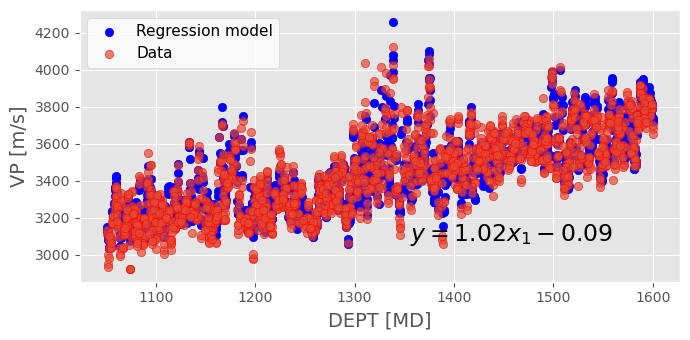

In [161]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.scatter(dept2, inv_pred_test, color='b', label='Regression model',marker="o")
ax.scatter(dept2, inv_test, edgecolor='r', alpha=0.7, label='Data')
ax.set_ylabel('VP [m/s]', fontsize=14)
ax.set_xlabel('DEPT [MD]', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()

**ZADANIE 4**

## ZAŁOŻENIE - Rezydua to różnica pomiędzy wartością oczekiwaną a wartością przewidywaną. Różnica ta powinna być koło 0. 

In [162]:
residuals = y_test-y_pred_test.reshape(-1)
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.00013171914919555197


In [164]:
residuals

4747   -0.072350
1199   -0.065659
5223    0.054152
4547   -0.078038
1862    0.038897
          ...   
1779    0.020940
1288   -0.035858
1893   -0.001160
3455    0.038560
5410   -0.072645
Name: VP [m/s], Length: 1651, dtype: float64

Wynik bardzo mały, prawie 0, zatem jest dobrze.

## ZAŁOŻENIE - HOMOSCEDASTYCZNOŚĆ

Rezydua równo rozproszone? Wariancja stała w czasie?

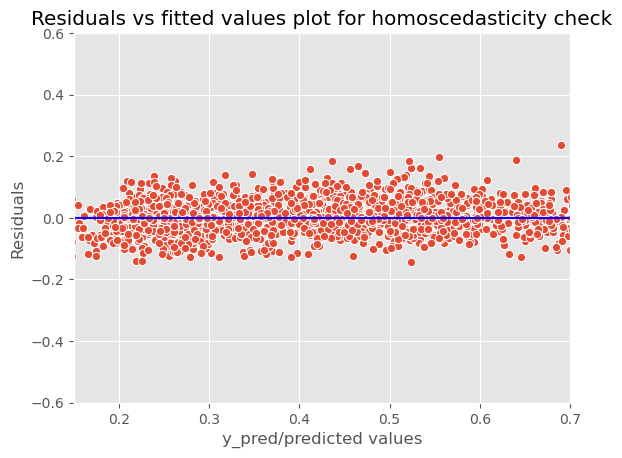

In [165]:
p = sns.scatterplot(y_pred_test.reshape(-1),residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.6,0.6)
plt.xlim(0.15,0.7)
p = sns.lineplot([0,75],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Rezydua są równomiernie rozmieszone, spełnione zostaje założenie homoskedastyczności.

## ZAŁOŻENIE - REZYDUA MAJĄ ROZKŁAD NORMALNY

In [166]:
from scipy.stats import probplot

In [167]:
res=np.array(residuals).reshape(1651,)

Text(0.5, 1.0, 'Q-Q Plot')

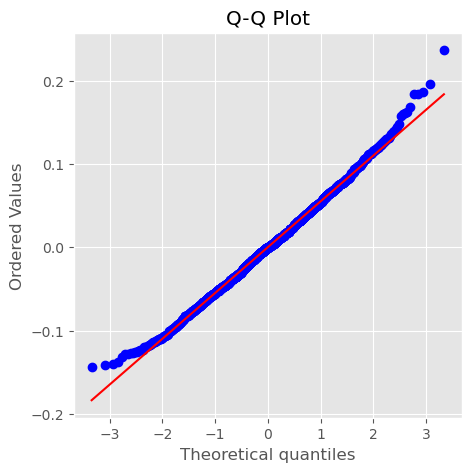

In [168]:
plt.figure(figsize=(5,5))
probplot(res, dist="norm", plot=plt)
plt.title("Q-Q Plot")

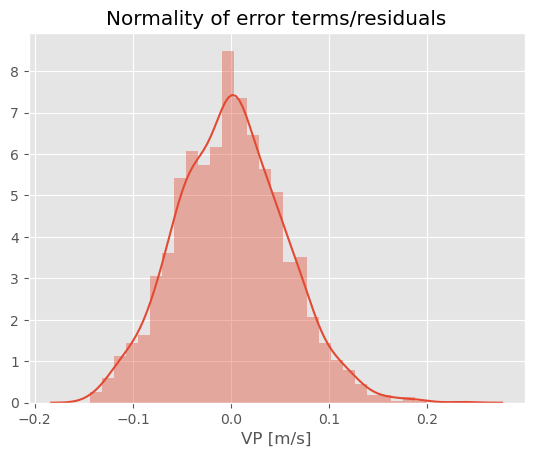

In [169]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Rozkład błędów/rezyduów jest zbliżony do normalnego. 

**Zadanie 5 i 6**

<center><h1 style="color: purple;">REGRESJA WIELORAKA</h1></center>


# Model dla prędkości fali podłużnej (VP) na podstawie PAR2 i PAR3

In [170]:
df_scaled.sample(10)

,PAR2,PAR3,VP [m/s]
4815,0.656009,0.186047,0.705246
1280,0.471840,0.325581,0.612823
2798,0.481979,0.348837,0.657785
2473,0.161161,0.465116,0.259784
2773,0.472290,0.302326,0.472939
4185,0.446955,0.488372,0.503747
628,0.285725,0.674419,0.263114
3786,0.380537,0.744186,0.444629
5128,0.449241,0.348837,0.531224
2307,0.208991,0.813953,0.279767


In [171]:
colnames=['PAR2','PAR3']
X=df_scaled[colnames]
Y=df_scaled['VP [m/s]']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=42)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(3850, 2) (1651, 2) (3850,) (1651,)


**TWORZENIE MODELU I TRENOWANIE**

In [172]:
LR=LinearRegression()
model=LR.fit(X_train.values.reshape(-1,2),y_train.values)

**OCENA JAKOŚCI MODELU**

In [173]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [174]:
print("R squared - train: {}".format(r2_score(y_true=y_train,y_pred=y_pred_train)))
print("R squared - test: {}".format(r2_score(y_true=y_test,y_pred=y_pred_test)))

R squared - train: 0.9133134011494107
R squared - test: 0.9125136274227865


In [175]:
inv_pred_test=scaler2.inverse_transform(y_pred_test.reshape(-1,1))
inv_test=scaler2.inverse_transform(y_test.values.reshape(-1,1))

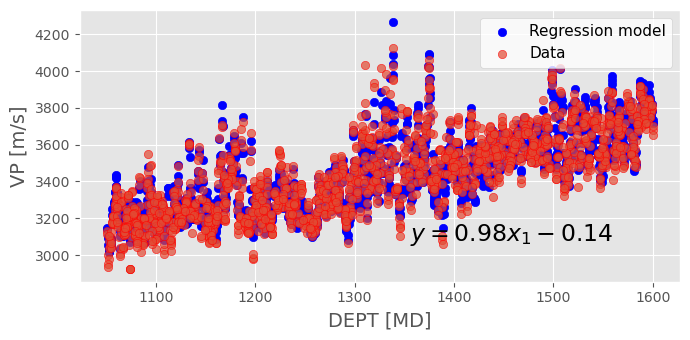

In [176]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.scatter(dept2, inv_pred_test, color='b', label='Regression model',marker="o")
ax.scatter(dept2, inv_test, edgecolor='r', alpha=0.7, label='Data')
ax.set_ylabel('VP [m/s]', fontsize=14)
ax.set_xlabel('DEPT [MD]', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()

W moim przypadku regresja wieloraka dała lepsze wyniki. Wartość współczynnika R^2 jest wyższa w tym przypadku, czyli większy procent danych został wyjaśniony przez ten model, dlatego też wybrałabym właśnie tą regresje. 